# Case Study 7: Classification

## by Farzad Minooei

## Business Understanding 

CRISP-DM: https://analica.ir/crisp-dm/

Churn prediction for telecom industry

Churn refers to the situation where a customer of a company stops using its products or services and leaves the company.

### Initial Setups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read data from csv file
data = pd.read_csv('cs_07.csv')
data.head()

,id,call_failures,if_complain,subscription_length,charge_amount,seconds_of_calls,frequency_of_calls,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,if_churn
0,1,8,0,38,0,4370,71,5,17,3,1,1,0
1,2,0,0,39,0,318,5,7,4,2,1,2,0
2,3,10,0,37,0,2453,60,359,24,3,1,1,0
3,4,10,0,38,0,4198,66,1,35,1,1,1,0
4,5,3,0,38,0,2393,58,2,33,1,1,1,0


In [3]:
data.shape

(3150, 13)

## Data Understanding

#### 1: Understand data collection process

Data gathered from Iranian telecom company over a 12-month period (from September 2006 to September 2007)

Call Detail Record (CDR) + CRM data base

#### 2: Document data set description (meta data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       3150 non-null   int64
 1   call_failures            3150 non-null   int64
 2   if_complain              3150 non-null   int64
 3   subscription_length      3150 non-null   int64
 4   charge_amount            3150 non-null   int64
 5   seconds_of_calls         3150 non-null   int64
 6   frequency_of_calls       3150 non-null   int64
 7   frequency_of_sms         3150 non-null   int64
 8   distinct_called_numbers  3150 non-null   int64
 9   age_group                3150 non-null   int64
 10  tariff_plan              3150 non-null   int64
 11  status                   3150 non-null   int64
 12  if_churn                 3150 non-null   int64
dtypes: int64(13)
memory usage: 320.0 KB


0 id: customer idification

1 call_failures: number of call failures (numeric)

2 if_complain: 0: No complaint, 1: complaint (binary)

3 subscription_length: total months of subscription (numeric)

4 charge_amount: 0: lowest amount, 9: highest amount (ordinal)

5 seconds_of_calls: total seconds of calls (numeric)

6 frequency_of_calls: total number of calls (numeric)

7 frequency_of_sms: number of sent short messages (numeric)

8 distinct_called_numbers: total number of distinct phone calls (numeric)

9 age_group: 1: less than 15, 2: between 15 and 30, 3: between 30 and 45, 4: between 45 and 60, 
5: between 60 and 75 (ordinal)

10 tariff_plan: 1: Pay as you go, 2: contractual (binary)

11 status: 1: active (customers who have not demonstrated inactive conditions)
2: non-active (customers who have not increased their account in two sequential months while having had less than 30 min worth of calls in the last month) (binary)

12 if_churn: if customer churns (i.e., sell or cedes SIM privilege to another person) (binary)

#### 3: Check for missing values

In [5]:
np.sum(data.isnull())

id                         0
call_failures              0
if_complain                0
subscription_length        0
charge_amount              0
seconds_of_calls           0
frequency_of_calls         0
frequency_of_sms           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
if_churn                   0
dtype: int64

#### 4: Univariate data analysis

In [6]:
#Check number of unique ids
data['id'].nunique()

3150

In [7]:
#Check if there is duplicate rows
np.sum(data.duplicated())

0

In [8]:
#Frequency table for response variable
data['if_churn'].value_counts(normalize = True)
#Class-imbalanced data

0    0.842857
1    0.157143
Name: if_churn, dtype: float64

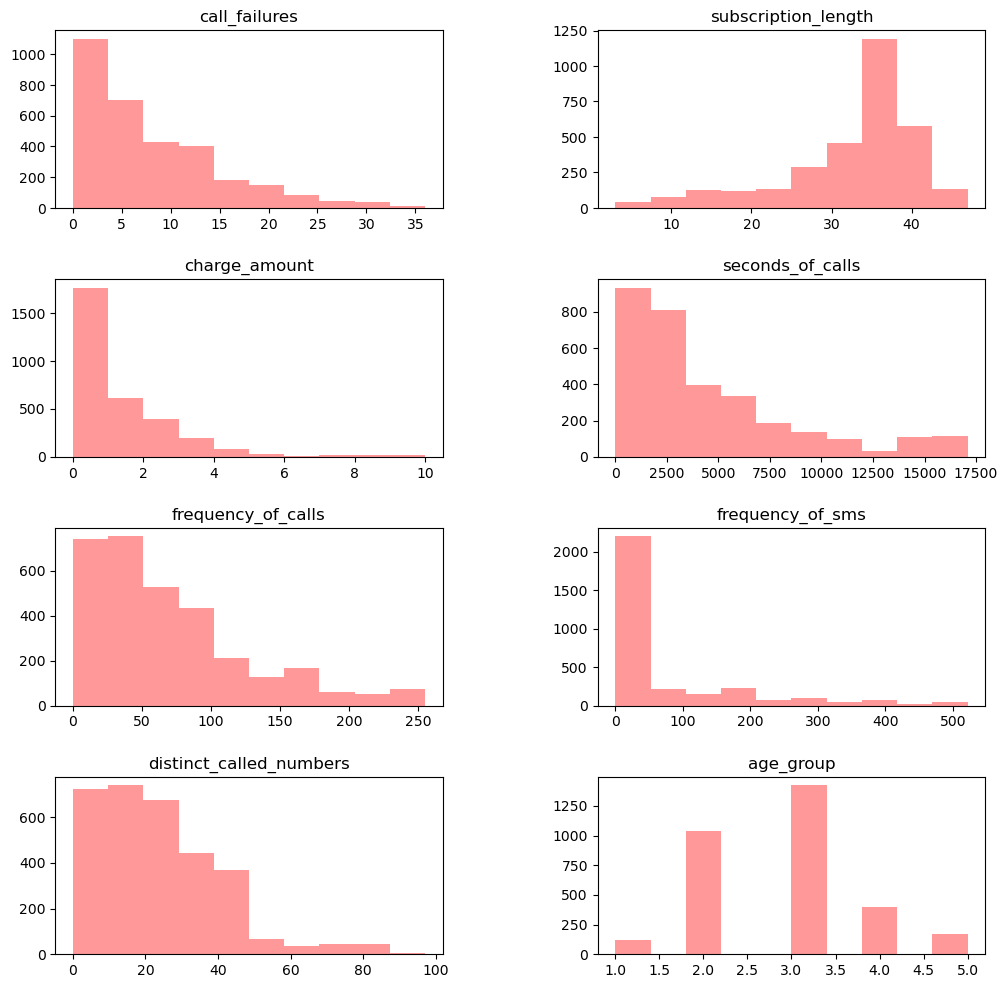

In [9]:
#Histogram of numeric variables
var_ind = [1, 3, 4, 5, 6, 7, 8, 9]
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 9):
    plt.subplot(4, 2, i)
    plt.hist(x = data.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'red')
    plt.title(data.columns[var_ind[i - 1]])

In [10]:
#Summary statistics of numeric variables
data.iloc[:, var_ind].describe()

,call_failures,subscription_length,charge_amount,seconds_of_calls,frequency_of_calls,frequency_of_sms,distinct_called_numbers,age_group
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032
std,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000
50%,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000
75%,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000
max,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000


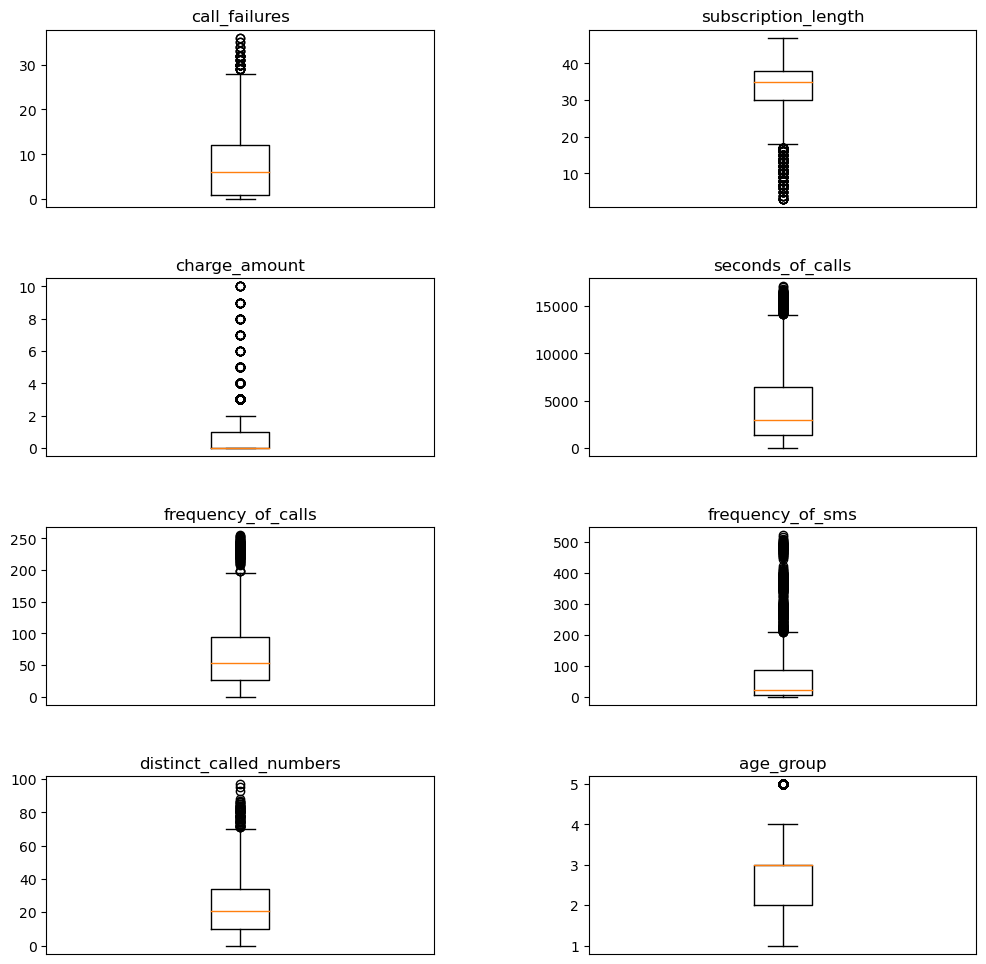

In [11]:
#Boxplot of numeric variables
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 9):
    plt.subplot(4, 2, i)
    plt.boxplot(data.iloc[: , var_ind[i - 1]])
    plt.xticks([]) #remove the xticks 
    plt.title(data.columns[var_ind[i - 1]])

In [12]:
#Frequency table for categorical variables
for i in ['if_complain', 'tariff_plan', 'status']:
    print('--- Frequency table for ' + i + ' ---')
    print(data[i].value_counts())

--- Frequency table for if_complain ---
0    2909
1     241
Name: if_complain, dtype: int64
--- Frequency table for tariff_plan ---
1    2905
2     245
Name: tariff_plan, dtype: int64
--- Frequency table for status ---
1    2368
2     782
Name: status, dtype: int64


#### 5: Bivariate data analysis

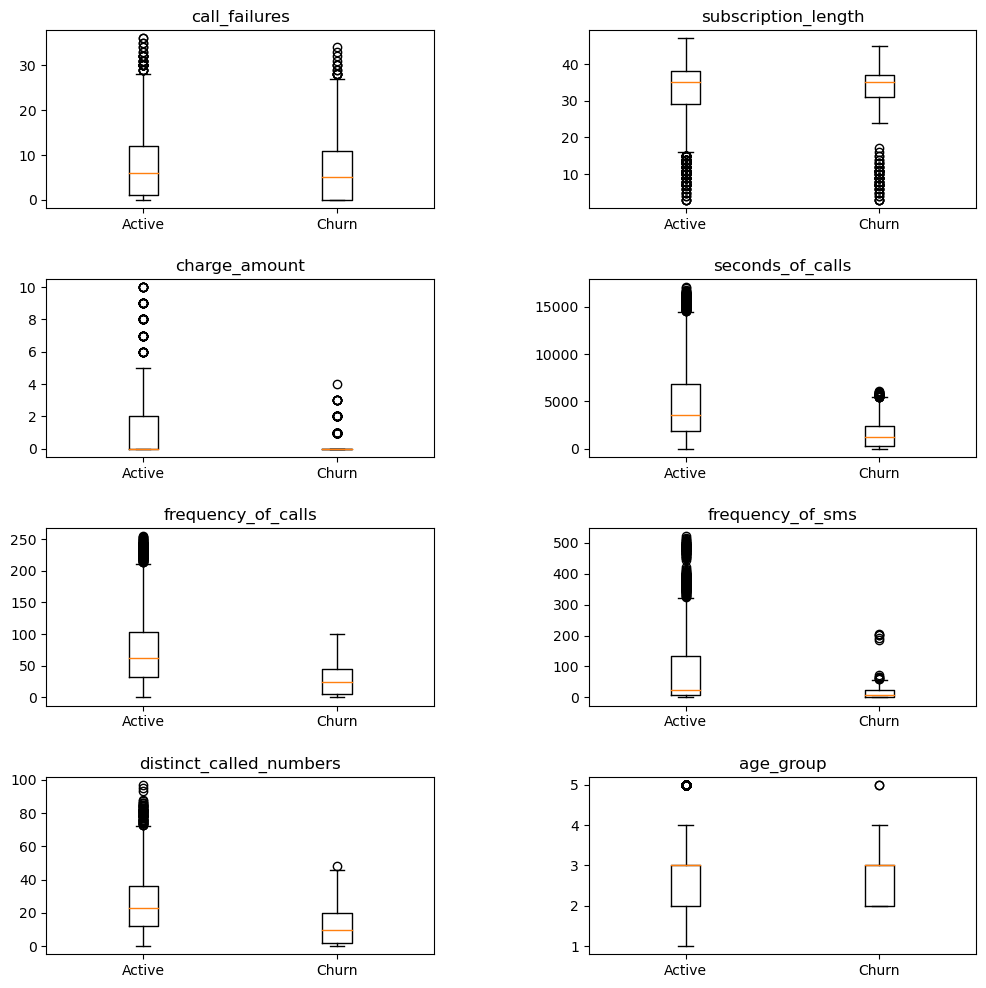

In [13]:
#Analysis of if_churn based on numeric variables
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 9):
    plt.subplot(4, 2, i)
    plt.boxplot([data.loc[data['if_churn'] == 0, data.columns[var_ind[i - 1]]],
                 data.loc[data['if_churn'] == 1, data.columns[var_ind[i - 1]]]])
    plt.title(data.columns[var_ind[i - 1]])
    plt.xticks(ticks = [1, 2], labels = ['Active', 'Churn'])

In [14]:
#Correlation analysis
corr_table = round(data.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table

,call_failures,subscription_length,charge_amount,seconds_of_calls,frequency_of_calls,frequency_of_sms,distinct_called_numbers,age_group
call_failures,1.00,0.17,0.59,0.50,0.57,-0.02,0.50,0.05
subscription_length,0.17,1.00,0.08,0.12,0.11,0.08,0.09,0.02
charge_amount,0.59,0.08,1.00,0.45,0.38,0.09,0.42,0.28
seconds_of_calls,0.50,0.12,0.45,1.00,0.95,0.10,0.68,0.02
frequency_of_calls,0.57,0.11,0.38,0.95,1.00,0.10,0.74,-0.03
frequency_of_sms,-0.02,0.08,0.09,0.10,0.10,1.00,0.08,-0.05
distinct_called_numbers,0.50,0.09,0.42,0.68,0.74,0.08,1.00,0.02
age_group,0.05,0.02,0.28,0.02,-0.03,-0.05,0.02,1.00


In [15]:
#Cross tab analysis
for i in ['if_complain', 'tariff_plan', 'status']:
    cross_tab_pct = round(pd.crosstab(data[i],
                                      data['if_churn'], 
                                      normalize = 'columns'), 2)
    print('--- cross table for if_churn vs. ' + i + ' ---')
    print(cross_tab_pct)

--- cross table for if_churn vs. if_complain ---
if_churn        0    1
if_complain           
0            0.98  0.6
1            0.02  0.4
--- cross table for if_churn vs. tariff_plan ---
if_churn        0     1
tariff_plan            
1            0.91  0.99
2            0.09  0.01
--- cross table for if_churn vs. status ---
if_churn     0     1
status              
1         0.84  0.25
2         0.16  0.75


## Data Preparation

In [16]:
#Remove id
data.drop(columns = 'id', inplace = True)

In [17]:
#Convert data type of categorical variables
data[['if_complain', 
      'tariff_plan', 
      'status']] = data[['if_complain',
                         'tariff_plan',
                         'status']].apply(lambda col: 
                                          col.astype('category'))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   call_failures            3150 non-null   int64   
 1   if_complain              3150 non-null   category
 2   subscription_length      3150 non-null   int64   
 3   charge_amount            3150 non-null   int64   
 4   seconds_of_calls         3150 non-null   int64   
 5   frequency_of_calls       3150 non-null   int64   
 6   frequency_of_sms         3150 non-null   int64   
 7   distinct_called_numbers  3150 non-null   int64   
 8   age_group                3150 non-null   int64   
 9   tariff_plan              3150 non-null   category
 10  status                   3150 non-null   category
 11  if_churn                 3150 non-null   int64   
dtypes: category(3), int64(9)
memory usage: 231.2 KB


## Build Predictive Models

In [19]:
#Split data into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, 
                               test_size = 0.3, 
                               random_state = 1234)
print(train.shape)
print(test.shape)

(2205, 12)
(945, 12)


In [20]:
#Define dummy variables for categorical varibales
dummy_vars = pd.get_dummies(train[['if_complain', 
                                   'tariff_plan', 
                                   'status']])

#Define base level for each categorical variable
dummy_vars.drop(columns = ['if_complain_1', 
                           'tariff_plan_2', 
                           'status_2'], inplace = True)
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 1218 to 2863
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   if_complain_0  2205 non-null   uint8
 1   tariff_plan_1  2205 non-null   uint8
 2   status_1       2205 non-null   uint8
dtypes: uint8(3)
memory usage: 23.7 KB


In [21]:
#Define feature matrix 
X_ = train.drop(['if_churn', 
                 'if_complain', 
                 'tariff_plan', 
                 'status'], axis = 1)
X_train_imbalanced = pd.concat([X_, dummy_vars], axis = 1)
X_train_imbalanced.head()

,call_failures,subscription_length,charge_amount,seconds_of_calls,frequency_of_calls,frequency_of_sms,distinct_called_numbers,age_group,if_complain_0,tariff_plan_1,status_1
1218,0,39,0,0,0,3,0,2,1,1,0
1430,0,34,0,6660,99,18,25,4,1,1,1
2881,3,33,0,933,7,8,5,4,1,1,0
424,11,33,1,5638,90,15,19,2,0,1,1
2338,8,25,1,1540,40,190,9,3,1,0,1


In [22]:
#Define response matrix
y_train = train['if_churn']
y_train

1218    1
1430    0
2881    1
424     1
2338    0
       ..
664     0
3125    0
1318    1
723     0
2863    0
Name: if_churn, Length: 2205, dtype: int64

### Logistic Regression

In [23]:
#Logistic regression/imbalanced data - model 1
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty = None, #None: no penalty, 
                                             #'l1': L1 Regularization, 
                                             #'l2': L2 Regularization
                             random_state = 1234,
                             max_iter = 100,
                             solver = 'saga') #'lbfgs' for small sample, 
                                              #'saga' for large sample
model_1 = log_reg.fit(X_train_imbalanced, y_train)
print(model_1.coef_)
print(model_1.intercept_)
#Note: convergence problem
#Possible solutions: 
#   Increase the number of iterations
#   Try a different optimizer
#   Scale data 

[[ 5.36760759e-04 -4.96707718e-04 -3.91147322e-05 -5.29362422e-04
  -2.23650009e-04 -4.38551371e-03 -3.66574096e-04 -4.65385838e-05
  -8.36105245e-05 -9.40687027e-06 -6.32628491e-05]]
[-1.46702547e-05]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_imbalanced_scaled = scaler.fit_transform(X_train_imbalanced)

In [25]:
#Logistic regression/imbalanced data - model 1
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty = None, #None: no penalty, 
                                             #'l1': L1 Regularization, 
                                             #'l2': L2 Regularization
                             random_state = 1234,
                             max_iter = 2000,
                             solver = 'saga') #'lbfgs' for small sample, 
                                              #'saga' for large sample
model_1 = log_reg.fit(X_train_imbalanced_scaled, y_train)
print(model_1.coef_)
print(model_1.intercept_)

[[ 0.97962014 -0.35494426 -0.86055128  1.59479456 -3.10769775 -1.32347678
  -0.17350959 -0.06240147 -1.03074587 -0.16990688 -0.5559783 ]]
[-3.53242923]


In [26]:
#Predict probability on train
y_train_prob_1 = model_1.predict_proba(X_train_imbalanced_scaled)
y_train_prob_1

array([[6.27184391e-01, 3.72815609e-01],
       [9.92808341e-01, 7.19165941e-03],
       [5.34857000e-01, 4.65143000e-01],
       ...,
       [6.59610575e-01, 3.40389425e-01],
       [9.90088778e-01, 9.91122173e-03],
       [9.99244122e-01, 7.55878000e-04]])

In [27]:
#Plot ROC curve
from sklearn.metrics import roc_curve, auc
def roc_plot(response, pred_prob):
    #Calculate false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(response, pred_prob)
    #Calculate area under curve
    print('Area under the ROC curve : {r: 0.3f}'.format(r = auc(fpr, tpr)))
    #Plot ROC curve
    plt.plot(fpr, tpr, c = 'red', linewidth = 2)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    return plt.show()

Area under the ROC curve :  0.935


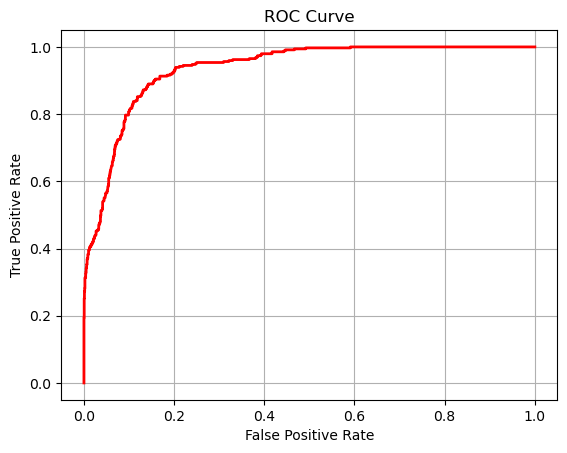

In [28]:
#Plot ROC curve - model 1
roc_plot(y_train, y_train_prob_1[:, 1])

In [29]:
#Youden’s index for optimal cut-off probability 
def find_optimal_cutoff(response, pred_prob):
    #Calculate false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(response, pred_prob)
    #Calculate the optimal cut-off
    cutoff = thresholds[np.argmax(tpr - fpr)]
    return round(cutoff, 3)

In [30]:
#Find the optimal cut-off
cutoff_1 = find_optimal_cutoff(y_train, y_train_prob_1[:, 1])
cutoff_1

0.192

In [31]:
#Predict class on train
y_train_pred_1 = pd.Series([1 if _ > cutoff_1 else 0 for _ in y_train_prob_1[:, 1]], 
                           index = y_train.index)
y_train_pred_1

1218    1
1430    0
2881    1
424     1
2338    0
       ..
664     0
3125    0
1318    1
723     0
2863    0
Length: 2205, dtype: int64

In [32]:
#Prediction evaluation on train
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
print('Accuracy is {r: 0.3f}'.format(r = accuracy_score(y_train, y_train_pred_1)))
print('Precision is {r: 0.3f}'.format(r = precision_score(y_train, y_train_pred_1)))
print('Recall is {r: 0.5f}'.format(r = recall_score(y_train, y_train_pred_1)))
#If both false positive and false negatives are equally important, 
# use F1 score
print('F1 score is {r: 0.3f}'.format(r = f1_score(y_train, y_train_pred_1)))
#If false negatives are more costly, use F2 score, 
# otherwise, if false positives are more costly, then use F0.5 score.
print('F2 score is {r: 0.3f}'.format(r = fbeta_score(y_train, y_train_pred_1, beta = 2)))
print('--- Confusion Matrix ---')
print(confusion_matrix(y_train, y_train_pred_1))

Accuracy is  0.862
Precision is  0.536
Recall is  0.88986
F1 score is  0.669
F2 score is  0.786
--- Confusion Matrix ---
[[1594  266]
 [  38  307]]


In [33]:
#Predict on test - model 1

#Define dummy variables for categorical varibales
dummy_vars = pd.get_dummies(test[['if_complain', 
                                  'tariff_plan', 
                                  'status']])

#Define base level for each categorical variable
dummy_vars.drop(columns = ['if_complain_1', 
                           'tariff_plan_2', 
                           'status_2'], inplace = True)

#Define feature matrix 
X_ = test.drop(['if_churn', 
                'if_complain', 
                'tariff_plan', 
                'status'], axis = 1)
X_test = pd.concat([X_, dummy_vars], axis = 1)

#Scale data
X_test_scaled = scaler.fit_transform(X_test)

#Predict probability on test
y_test_prob_1 = model_1.predict_proba(X_test_scaled)

#Predict class on test
y_test_pred_1 = pd.Series([1 if _ > cutoff_1 else 0 for _ in y_test_prob_1[:, 1]],
                          index = test.index)
y_test_pred_1

358     0
775     1
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     0
1879    0
Length: 945, dtype: int64

In [34]:
#Model evaluation on test - model 1
models_comp = pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                       y_test_pred_1),
                            'Precision': precision_score(test['if_churn'], 
                                                         y_test_pred_1),
                            'Recall': recall_score(test['if_churn'], 
                                                   y_test_pred_1),
                            'F1 Score': f1_score(test['if_churn'], 
                                                 y_test_pred_1),
                            'F2 Score': fbeta_score(test['if_churn'], 
                                                    y_test_pred_1, beta = 2)
                            }, 
                            index = ['LogReg-Imbalanced-All Features'])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg-Imbalanced-All Features,0.860317,0.537815,0.853333,0.659794,0.763723


In [35]:
#Confusion matrix - model 1
confusion_matrix(test['if_churn'], y_test_pred_1)

array([[685, 110],
       [ 22, 128]], dtype=int64)

In [36]:
#Function to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
    #Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return(vif)

In [37]:
#Check multicollinearity for numeric variables
vif(X_train_imbalanced.iloc[:, :8])
#Note: If VIF > 10 then multicollinearity is high

,variables,VIF
0,call_failures,5.099190
1,subscription_length,8.820053
2,charge_amount,3.006309
3,seconds_of_calls,27.670899
4,frequency_of_calls,39.082314
5,frequency_of_sms,1.505975
6,distinct_called_numbers,6.829421
7,age_group,7.555469


Note: Imbalanced class data and multicolinearity problem

In [38]:
#%pip install imblearn
import imblearn
print(imblearn.__version__)

0.10.1


In [39]:
#Define oversampling strategy
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')

#Fit and apply the transform
X_train_over_scaled, y_train_over = oversample.fit_resample(X_train_imbalanced_scaled, 
                                                            y_train)

In [40]:
#Feature selection
from sklearn.feature_selection import RFECV
rfe = RFECV(LogisticRegression(), cv = 10, scoring = 'roc_auc')
rfe.fit(X_train_over_scaled, y_train_over)
print(rfe.support_)

[ True  True  True  True  True  True  True False  True False  True]


In [41]:
#Selected features indices
selected_features_ind = np.where(rfe.support_)
selected_features_ind

(array([ 0,  1,  2,  3,  4,  5,  6,  8, 10], dtype=int64),)

In [42]:
X_train_imbalanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 1218 to 2863
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   call_failures            2205 non-null   int64
 1   subscription_length      2205 non-null   int64
 2   charge_amount            2205 non-null   int64
 3   seconds_of_calls         2205 non-null   int64
 4   frequency_of_calls       2205 non-null   int64
 5   frequency_of_sms         2205 non-null   int64
 6   distinct_called_numbers  2205 non-null   int64
 7   age_group                2205 non-null   int64
 8   if_complain_0            2205 non-null   uint8
 9   tariff_plan_1            2205 non-null   uint8
 10  status_1                 2205 non-null   uint8
dtypes: int64(8), uint8(3)
memory usage: 161.5 KB


In [43]:
#Logistic regression w/ oversampling & feature selection - model 2
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty = None, #None: no penalty, 
                                             #'l1': L1 Regularization, 
                                             #'l2': L2 Regularization
                             random_state = 1234,
                             max_iter = 100,
                             solver = 'saga') #'lbfgs' for small sample, 
                                              #'saga' for large sample
model_2 = log_reg.fit(X_train_over_scaled[:, selected_features_ind[0]], y_train_over)
print(model_2.coef_)
print(model_2.intercept_)

[[ 1.12562966 -0.38154915 -0.88971952  1.12512905 -2.51764722 -1.27779902
  -0.35592739 -1.16536642 -0.64863508]]
[-1.91556777]


In [44]:
#Predict probability on train
y_train_prob_2 = model_2.predict_proba(X_train_over_scaled[:, selected_features_ind[0]])

#Find the optimal cut-off
cutoff_2 = find_optimal_cutoff(y_train_over, y_train_prob_2[:, 1])
cutoff_2

0.549

In [45]:
#Predict probability on test
y_test_prob_2 = model_2.predict_proba(X_test_scaled[:, selected_features_ind[0]])

#Predict class on test
y_test_pred_2 = pd.Series([1 if _ > cutoff_2 else 0 for _ in y_test_prob_2[:, 1]],
                          index = test.index)
y_test_pred_2

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     0
1879    0
Length: 945, dtype: int64

In [46]:
#Model evaluation on test - model 2
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_2),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_2),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_2),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_2),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_2, beta = 2)
                                      }, 
                                      index = ['LogReg-Oversampling-Selected Features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg-Imbalanced-All Features,0.860317,0.537815,0.853333,0.659794,0.763723
LogReg-Oversampling-Selected Features,0.864550,0.547009,0.853333,0.666667,0.767386


In [47]:
#Confusion matrix - model 2
confusion_matrix(test['if_churn'], y_test_pred_2)

array([[689, 106],
       [ 22, 128]], dtype=int64)

In [48]:
#Define undersampling strategy
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy = 'majority')

#Fit and apply the transform
X_train_under_scaled, y_train_under = undersample.fit_resample(X_train_imbalanced_scaled, 
                                                               y_train)

#Feature selection
from sklearn.feature_selection import RFECV
rfe = RFECV(LogisticRegression(), cv = 10, scoring = 'roc_auc')
rfe.fit(X_train_under_scaled, y_train_under)

#Selected features indices
selected_features_ind = np.where(rfe.support_)

#Logistic regression w/ undersampling & feature selection - model 3
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty = None, #None: no penalty, 
                                             #'l1': L1 Regularization, 
                                             #'l2': L2 Regularization
                             random_state = 1234,
                             max_iter = 200,
                             solver = 'saga') #'lbfgs' for small sample, 
                                              #'saga' for large sample
model_3 = log_reg.fit(X_train_under_scaled[:, selected_features_ind[0]], y_train_under)
print(model_3.coef_)
print(model_3.intercept_)

[[ 1.24307168 -0.65926177 -0.97237383 -0.70006307 -1.25875657 -0.79629758
   0.19193606 -1.24091944  0.09789018 -0.98389034]]
[-1.85846169]


In [49]:
#Predict probability on train
y_train_prob_3 = model_3.predict_proba(X_train_under_scaled[:, selected_features_ind[0]])

#Find the optimal cut-off
cutoff_3 = find_optimal_cutoff(y_train_under, y_train_prob_3[:, 1])
cutoff_3

0.44

In [50]:
#Predict probability on test
y_test_prob_3 = model_3.predict_proba(X_test_scaled[:, selected_features_ind[0]])

#Predict class on test
y_test_pred_3 = pd.Series([1 if _ > cutoff_3 else 0 for _ in y_test_prob_3[:, 1]],
                          index = test.index)
y_test_pred_3

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     1
636     1
1879    0
Length: 945, dtype: int64

In [51]:
#Model evaluation on test - model 3
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_3),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_3),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_3),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_3),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_3, beta = 2)
                                      }, 
                                      index = ['LogReg-Undersampling-Selected Features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg-Imbalanced-All Features,0.860317,0.537815,0.853333,0.659794,0.763723
LogReg-Oversampling-Selected Features,0.864550,0.547009,0.853333,0.666667,0.767386
LogReg-Undersampling-Selected Features,0.826455,0.475000,0.886667,0.618605,0.755682


In [52]:
#Confusion matrix - model 3
confusion_matrix(test['if_churn'], y_test_pred_3)

array([[648, 147],
       [ 17, 133]], dtype=int64)

### Logistic Regression w/ Regularization

In [53]:
#Create hyper-parameters grid
import itertools
penalty = ['l1', 'l2']
#C: Inverse of regularization strength; 
#  smaller values specify stronger regularization.
c_reg = 10 ** np.linspace(-3, 3, 20)
params_grid = list(itertools.product(penalty, c_reg))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 41), 
                           columns = ['penalty', 'c_reg'])
params_grid

,penalty,c_reg
1,l1,0.001000
2,l1,0.002069
3,l1,0.004281
4,l1,0.008859
5,l1,0.018330
6,l1,0.037927
7,l1,0.078476
8,l1,0.162378
9,l1,0.335982
10,l1,0.695193


In [54]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_scores = np.zeros(shape = len(params_grid)) #to save cv results

import time #to measure the processing time
start_time = time.time()
for i in range(len(params_grid)):
    log_reg = LogisticRegression(penalty = params_grid.iloc[i, 0],
                                 C = params_grid.iloc[i, 1],
                                 max_iter = 100,
                                 solver = 'saga')
    scores = cross_val_score(estimator = log_reg, 
                             X = X_train_under_scaled, 
                             y = y_train_under,
                             scoring = 'roc_auc',
                             cv = 10, n_jobs = -1)
    cv_scores[i] = scores.mean()
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  14.477288007736206 seconds


In [55]:
#Best model
params_grid.iloc[np.argmax(cv_scores), :]

penalty          l1
c_reg      12.74275
Name: 14, dtype: object

In [56]:
#Train model 4
log_reg = LogisticRegression(penalty = params_grid.iloc[np.argmax(cv_scores), 0],
                             C = params_grid.iloc[np.argmax(cv_scores), 1],
                             random_state = 1234,
                             max_iter = 500,
                             solver = 'saga')
model_4 = log_reg.fit(X_train_under_scaled, y_train_under)
print(model_4.coef_)
print(model_4.intercept_)

[[ 1.27047284 -0.65710098 -1.02202554  0.40132827 -1.06164341 -1.26811901
  -0.77342716  0.19233347 -1.22704473  0.04812208 -0.98496766]]
[-1.84257666]


In [57]:
#Predict probability on train
y_train_prob_4 = model_4.predict_proba(X_train_under_scaled)

#Find the optimal cut-off
cutoff_4 = find_optimal_cutoff(y_train_under, y_train_prob_4[:, 1])
cutoff_4

0.612

In [58]:
#Predict probability on test
y_test_prob_4 = model_4.predict_proba(X_test_scaled)

#Predict class on test
y_test_pred_4 = pd.Series([1 if _ > cutoff_4 else 0 for _ in y_test_prob_4[:, 1]],
                          index = test.index)
y_test_pred_4

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     1
1879    0
Length: 945, dtype: int64

In [59]:
#Model evaluation on test - model 4
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_4),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_4),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_4),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_4),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_4, beta = 2)
                                      }, 
                                      index = ['LogReg-Undersampling-w/ Regularization'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg-Imbalanced-All Features,0.860317,0.537815,0.853333,0.659794,0.763723
LogReg-Oversampling-Selected Features,0.864550,0.547009,0.853333,0.666667,0.767386
LogReg-Undersampling-Selected Features,0.826455,0.475000,0.886667,0.618605,0.755682
LogReg-Undersampling-w/ Regularization,0.868783,0.556522,0.853333,0.673684,0.771084


In [60]:
#Confusion matrix - model 4
confusion_matrix(test['if_churn'], y_test_pred_4)

array([[693, 102],
       [ 22, 128]], dtype=int64)

In [61]:
#Logistic regression/imbalanced data - model 5
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty = None, #None: no penalty, 
                                             #'l1': L1 Regularization, 
                                             #'l2': L2 Regularization
                             random_state = 1234,
                             class_weight = 'balanced',
                             max_iter = 200,
                             solver = 'saga')#'lbfgs' for small sample, 
                                             #'saga' for large sample
model_5 = log_reg.fit(X_train_imbalanced_scaled, y_train)
print(model_1.coef_)
print(model_1.intercept_)

[[ 0.97962014 -0.35494426 -0.86055128  1.59479456 -3.10769775 -1.32347678
  -0.17350959 -0.06240147 -1.03074587 -0.16990688 -0.5559783 ]]
[-3.53242923]


In [62]:
#Predict probability on train
y_train_prob_5 = model_5.predict_proba(X_train_imbalanced_scaled)

#Find the optimal cut-off
cutoff_5 = find_optimal_cutoff(y_train, y_train_prob_5[:, 1])
cutoff_5

0.564

In [63]:
#Predict probability on test
y_test_prob_5 = model_5.predict_proba(X_test_scaled)

#Predict class on test
y_test_pred_5 = pd.Series([1 if _ > cutoff_5 else 0 for _ in y_test_prob_5[:, 1]],
                          index = test.index)
y_test_pred_5

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     1
1879    0
Length: 945, dtype: int64

In [64]:
#Model evaluation on test - model 5
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_5),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_5),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_5),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_5),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_5, beta = 2)
                                      }, 
                                      index = ['LogReg-Class Weight-All Features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg-Imbalanced-All Features,0.860317,0.537815,0.853333,0.659794,0.763723
LogReg-Oversampling-Selected Features,0.864550,0.547009,0.853333,0.666667,0.767386
LogReg-Undersampling-Selected Features,0.826455,0.475000,0.886667,0.618605,0.755682
LogReg-Undersampling-w/ Regularization,0.868783,0.556522,0.853333,0.673684,0.771084
LogReg-Class Weight-All Features,0.862434,0.542373,0.853333,0.663212,0.765550


In [65]:
#Confusion matrix - model 5
confusion_matrix(test['if_churn'], y_test_pred_5)

array([[687, 108],
       [ 22, 128]], dtype=int64)

### kNN Classifier

In [66]:
#%pip install gower
import gower

In [67]:
#Calculate distance matrix based on Gower distance
train_dist_matrix = gower.gower_matrix(X_train_over_scaled, 
                                       cat_features = [False] * 8 + [True] * 3)
print(X_train_over_scaled.shape)
print(train_dist_matrix.shape)

(3720, 11)
(3720, 3720)


In [68]:
#kNN classifier/Oversampling data - model 6
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 9, 
                                      weights = 'uniform',
                                      algorithm = 'auto',  
                                      metric = 'precomputed')
model_6 = knn_classifier.fit(train_dist_matrix, y_train_over)

In [69]:
#Calculate distance matrix based on Gower distance
test_train_dist_matrix = gower.gower_matrix(X_test_scaled,
                                            X_train_over_scaled,
                                            cat_features = [False] * 8 + [True] * 3)
print(X_train_over_scaled.shape)
print(X_test_scaled.shape)
print(test_train_dist_matrix.shape)

(3720, 11)
(945, 11)
(945, 3720)


In [70]:
#Predict on test
y_test_pred_6 = pd.Series(model_6.predict(test_train_dist_matrix), index = test.index)
y_test_pred_6

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     1
1879    1
Length: 945, dtype: int64

In [71]:
#Model evaluation on test - model 6
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_6),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_6),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_6),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_6),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_6, beta = 2)
                                      }, 
                                      index = ['kNN-Oversampling-Not Tuned'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg-Imbalanced-All Features,0.860317,0.537815,0.853333,0.659794,0.763723
LogReg-Oversampling-Selected Features,0.864550,0.547009,0.853333,0.666667,0.767386
LogReg-Undersampling-Selected Features,0.826455,0.475000,0.886667,0.618605,0.755682
LogReg-Undersampling-w/ Regularization,0.868783,0.556522,0.853333,0.673684,0.771084
LogReg-Class Weight-All Features,0.862434,0.542373,0.853333,0.663212,0.765550
kNN-Oversampling-Not Tuned,0.904762,0.633929,0.946667,0.759358,0.861650


In [72]:
#Confusion matrix - model 6
confusion_matrix(test['if_churn'], y_test_pred_6)

array([[713,  82],
       [  8, 142]], dtype=int64)

### Random Forest

In [73]:
#Sample Random Forest model (not tuned)
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 200,
                                       max_features = 4, 
                                       criterion = 'gini',
                                       max_depth = 10, 
                                       min_samples_leaf = 15, 
                                       ccp_alpha = 0,
                                       class_weight = 'balanced',
                                       random_state = 1234)
model_7 = rf_classifier.fit(X_train_imbalanced, y_train)

In [74]:
#Predict probability on test
y_test_pred_7 = pd.Series(model_7.predict(X_test), index = test.index)
y_test_pred_7

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     1
1879    0
Length: 945, dtype: int64

In [75]:
#Model evaluation on test - model 7
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_7),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_7),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_7),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_7),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_7, beta = 2)
                                      }, 
                                      index = ['Random Forest-Class Weight-Not Tuned'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg-Imbalanced-All Features,0.860317,0.537815,0.853333,0.659794,0.763723
LogReg-Oversampling-Selected Features,0.864550,0.547009,0.853333,0.666667,0.767386
LogReg-Undersampling-Selected Features,0.826455,0.475000,0.886667,0.618605,0.755682
LogReg-Undersampling-w/ Regularization,0.868783,0.556522,0.853333,0.673684,0.771084
LogReg-Class Weight-All Features,0.862434,0.542373,0.853333,0.663212,0.765550
kNN-Oversampling-Not Tuned,0.904762,0.633929,0.946667,0.759358,0.861650
Random Forest-Class Weight-Not Tuned,0.918519,0.689119,0.886667,0.775510,0.838588


In [76]:
#Confusion matrix - model 7
confusion_matrix(test['if_churn'], y_test_pred_7)

array([[735,  60],
       [ 17, 133]], dtype=int64)

In [77]:
#Create hyper-parameters grid
import itertools
n_estimators = [200, 500]
max_features = ['sqrt', 'log2', None] #If None or 1.0, then max_features = n_features
max_depth = [5, 15]
min_samples_leaf = [5, 15]
params_grid = list(itertools.product(n_estimators, 
                                     max_features, 
                                     max_depth, 
                                     min_samples_leaf))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 25), 
                           columns = ['n_estimators', 
                                      'max_features', 
                                      'max_depth', 
                                      'min_samples_leaf'])
params_grid

,n_estimators,max_features,max_depth,min_samples_leaf
1,200,sqrt,5,5
2,200,sqrt,5,15
3,200,sqrt,15,5
4,200,sqrt,15,15
5,200,log2,5,5
6,200,log2,5,15
7,200,log2,15,5
8,200,log2,15,15
9,200,None,5,5
10,200,None,5,15


In [78]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_scores = np.zeros(shape = len(params_grid)) #to save cv results

import time #to measure the processing time

start_time = time.time()
for i in range(len(params_grid)):
    rf_classifier = RandomForestClassifier(n_estimators = params_grid.iloc[i, 0],
                                           max_features = params_grid.iloc[i, 1], 
                                           criterion = 'gini',
                                           max_depth = params_grid.iloc[i, 2], 
                                           min_samples_leaf = params_grid.iloc[i, 3],
                                           class_weight = 'balanced',
                                           ccp_alpha = 0)
    scores = cross_val_score(estimator = rf_classifier, 
                             X = X_train_imbalanced, 
                             y = y_train,
                             scoring = 'roc_auc',
                             cv = 5, n_jobs = -1)
    cv_scores[i] = scores.mean()
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  134.90053534507751 seconds


In [79]:
#Best model
params_grid.iloc[np.argmax(cv_scores), :]

n_estimators         500
max_features        sqrt
max_depth             15
min_samples_leaf       5
Name: 15, dtype: object

In [80]:
#Train model 8
rf_classifier = RandomForestClassifier(n_estimators = params_grid.iloc[np.argmax(cv_scores), 0],
                                       max_features = params_grid.iloc[np.argmax(cv_scores), 1], 
                                       criterion = 'gini',
                                       max_depth = params_grid.iloc[np.argmax(cv_scores), 2], 
                                       min_samples_leaf = params_grid.iloc[np.argmax(cv_scores), 3], 
                                       class_weight = 'balanced',
                                       ccp_alpha = 0,
                                       random_state = 1234)
model_8 = rf_classifier.fit(X_train_imbalanced, y_train)

#Prediction using model 8
y_test_pred_8 = pd.Series(model_8.predict(X_test), index = test.index)
y_test_pred_8

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     0
1879    0
Length: 945, dtype: int64

In [81]:
#Model evaluation on test - model 8
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_8),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_8),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_8),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_8),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_8, beta = 2)
                                      }, 
                                      index = ['Random Forest-Class Weight-Tuned'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg-Imbalanced-All Features,0.860317,0.537815,0.853333,0.659794,0.763723
LogReg-Oversampling-Selected Features,0.864550,0.547009,0.853333,0.666667,0.767386
LogReg-Undersampling-Selected Features,0.826455,0.475000,0.886667,0.618605,0.755682
LogReg-Undersampling-w/ Regularization,0.868783,0.556522,0.853333,0.673684,0.771084
LogReg-Class Weight-All Features,0.862434,0.542373,0.853333,0.663212,0.765550
kNN-Oversampling-Not Tuned,0.904762,0.633929,0.946667,0.759358,0.861650
Random Forest-Class Weight-Not Tuned,0.918519,0.689119,0.886667,0.775510,0.838588
Random Forest-Class Weight-Tuned,0.947090,0.801205,0.886667,0.841772,0.868146


In [82]:
#Confusion matrix - model 8
confusion_matrix(test['if_churn'], y_test_pred_8)

array([[762,  33],
       [ 17, 133]], dtype=int64)

### Support Vector Machine 

In [83]:
from sklearn.svm import SVC
#svc = SVC(kernel = 'poly', degree = 2, C = 100)
#Degree?
#C: Regularization parameter. 
#   The strength of the regularization is inversely proportional to C.

In [84]:
#Create hyper-parameters grid
degree_grid = [2, 3, 4]
#C: Inverse of regularization strength; 
#  smaller values specify stronger regularization.
c_reg = 10 ** np.linspace(-3, 3, 7)
params_grid = list(itertools.product(degree_grid, c_reg))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 22), 
                           columns = ['degree_grid', 'c_reg'])
params_grid

,degree_grid,c_reg
1,2,0.001
2,2,0.010
3,2,0.100
4,2,1.000
5,2,10.000
6,2,100.000
7,2,1000.000
8,3,0.001
9,3,0.010
10,3,0.100


In [85]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_scores = np.zeros(shape = len(params_grid)) #to save cv results
import time #to measure the processing time
start_time = time.time()
for i in range(len(params_grid)):
    svc = SVC(kernel = 'poly', 
              degree = params_grid.iloc[i, 0], 
              C = params_grid.iloc[i, 1])
    scores = cross_val_score(svc, 
                             X_train_over_scaled, 
                             y_train_over, 
                             cv = 5, scoring = 'roc_auc')
    cv_scores[i] = scores.mean()
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  55.6701443195343 seconds


In [86]:
#Best model
params_grid.iloc[np.argmax(cv_scores), :]

degree_grid       4.0
c_reg          1000.0
Name: 21, dtype: float64

In [87]:
svc = SVC(kernel = 'poly', 
          degree = params_grid.iloc[np.argmax(cv_scores), 0], 
          C = params_grid.iloc[np.argmax(cv_scores), 1])

model_9 = svc.fit(X_train_over_scaled, y_train_over)

#Prediction using model 8
y_test_pred_9 = pd.Series(model_9.predict(X_test_scaled), index = test.index)
y_test_pred_9

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     0
1879    0
Length: 945, dtype: int64

In [88]:
#Model evaluation on test - model 9
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_9),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_9),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_9),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_9),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_9, beta = 2)
                                      }, 
                                      index = ['SVM-Oversampling-Tuned'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg-Imbalanced-All Features,0.860317,0.537815,0.853333,0.659794,0.763723
LogReg-Oversampling-Selected Features,0.864550,0.547009,0.853333,0.666667,0.767386
LogReg-Undersampling-Selected Features,0.826455,0.475000,0.886667,0.618605,0.755682
LogReg-Undersampling-w/ Regularization,0.868783,0.556522,0.853333,0.673684,0.771084
LogReg-Class Weight-All Features,0.862434,0.542373,0.853333,0.663212,0.765550
kNN-Oversampling-Not Tuned,0.904762,0.633929,0.946667,0.759358,0.861650
Random Forest-Class Weight-Not Tuned,0.918519,0.689119,0.886667,0.775510,0.838588
Random Forest-Class Weight-Tuned,0.947090,0.801205,0.886667,0.841772,0.868146
SVM-Oversampling-Tuned,0.957672,0.808989,0.960000,0.878049,0.925450


In [89]:
#Confusion matrix - model 9
confusion_matrix(test['if_churn'], y_test_pred_9)

array([[761,  34],
       [  6, 144]], dtype=int64)

# Assignment

Create a synthetic data set which includes 600 observations with two features (x1, x2) using the code below:

    from sklearn import datasets

    features, response = datasets.make_blobs(n_samples = [300, 300], 
                                             n_features = 2, 
                                             centers = [(5, 5), (6.5, 5)], 
                                             cluster_std = 0.5, 
                                             random_state = 123)
                                         
                                         
Split data into test and train. The goal is to predict class of each observation based on x1 and x2 using Logistic Regression, kNN, Random Forest, and Support Vector Machines. 

Evaluate the performance of your model on test based on accuracy, precision, recall, and F1 score.

# End of Code